### 자연어 처리
- 수집
- 정제 및 토큰화
- 불용어 / 구두점 제거
- 단어사전 => 토큰 : 숫자 맵핑 진행

[1] 모듈 로딩 및 데이터 준비 <hr>

In [1]:
# 모듈 로딩
from nltk.tokenize import word_tokenize, sent_tokenize, wordpunct_tokenize

In [2]:
# 데이터 준비
TEXT_FILE='../data/corpus_data.txt'

In [3]:
# 파일에서 데이터 추출 => 'rt' : 파일읽기의 기본값
with open(TEXT_FILE,mode='rt',encoding='utf-8') as f :
    # 읽을 데이터 사이즈 지정한 만큼 읽기
    text_data100=f.read(100)
    f.seek(0)       # 다시 처음부터 
    text_data=f.read()

In [4]:
len(text_data)

42052

In [5]:
# 라인 단위로 읽기 => readline()
with open(TEXT_FILE,mode='rt',encoding='utf-8') as f :
    # 한 줄씩 ('\n') 읽기
    text_data=f.readline()

In [6]:
print(text_data)

"The Tichborne Claimant" redirects here. For the 1998 film, see The Tichborne Claimant (film).



In [7]:
# 라인 단위로 읽기 => readline()
with open(TEXT_FILE,mode='rt',encoding='utf-8') as f :
    while True:
        # 한 줄씩 ('\n') 파일 전체 읽기
        text_data=f.readline()
        if not text_data:
            break

In [8]:
# 라인 단위로 읽기 => readline()
with open(TEXT_FILE,mode='rt',encoding='utf-8') as f :
    all_data=[]
    while True:
        # 한 줄씩 ('\n') 파일 전체 읽기
        text_data=f.readline()
        if not text_data:
            break
        else:
            all_data.append(text_data)

In [9]:
print(all_data)
print(len(all_data))

['"The Tichborne Claimant" redirects here. For the 1998 film, see The Tichborne Claimant (film).\n', '\n', "The blended image (centre) was said by the Claimant's supporters to prove that Roger Tichborne (left, in 1853) and the Claimant (right, in 1874) were one and the same person.[n 1]\n", 'The Tichborne case was a legal cause célèbre that fascinated Victorian Britain in the 1860s and 1870s. It concerned the claims by a man sometimes referred to as Thomas Castro or as Arthur Orton, but usually termed "the Claimant", to be the missing heir to the Tichborne baronetcy. He failed to convince the courts, was convicted of perjury and served a 14-year prison sentence.\n', '\n', "Roger Tichborne, heir to the family's title and fortunes, was presumed to have died in a shipwreck in 1854 at age 25. His mother clung to a belief that he might have survived, and after hearing rumours that he had made his way to Australia, she advertised extensively in Australian newspapers, offering a reward for in

In [10]:
# 라인 단위로 읽기 => readline()
with open(TEXT_FILE,mode='rt',encoding='utf-8') as f :
        # 한 줄씩 ('\n') 파일 전체 읽어서 리스트에 담아서 반환
        text_data=f.readlines()

In [11]:
print(text_data)

['"The Tichborne Claimant" redirects here. For the 1998 film, see The Tichborne Claimant (film).\n', '\n', "The blended image (centre) was said by the Claimant's supporters to prove that Roger Tichborne (left, in 1853) and the Claimant (right, in 1874) were one and the same person.[n 1]\n", 'The Tichborne case was a legal cause célèbre that fascinated Victorian Britain in the 1860s and 1870s. It concerned the claims by a man sometimes referred to as Thomas Castro or as Arthur Orton, but usually termed "the Claimant", to be the missing heir to the Tichborne baronetcy. He failed to convince the courts, was convicted of perjury and served a 14-year prison sentence.\n', '\n', "Roger Tichborne, heir to the family's title and fortunes, was presumed to have died in a shipwreck in 1854 at age 25. His mother clung to a belief that he might have survived, and after hearing rumours that he had made his way to Australia, she advertised extensively in Australian newspapers, offering a reward for in

- [2] 데이터 전처리 <hr>

- 줄바꿈 문자 ('\n') 처리

In [12]:
# 예) ['abcd\n','\n','aaaa      dfdf\n']
all_text=[]
for text in text_data:
    text=text.replace('\n','')
    if len(text):
        all_text.append(text)
print(f'all_text => {len(all_text)}개')

all_text => 87개


- 대소문자 통일

In [13]:
all_text=[text.lower() for text in all_text]
## list conprehension

In [14]:
all_text=(text.lower() for text in all_text)
## generator 형태로 나옴
## for문돌려서 하나씩 꺼낼떄 사용 메모리사용 적어짐!

In [15]:
# # 제너레이터 데이터 추출시
# import time
# for _ in all_text:
#     print(_)
#     #time.sleep(1)

- 토큰화

In [16]:
all_tokens=[]
for text in all_text:
    all_tokens.append(wordpunct_tokenize(text))

In [17]:
all_tokens

[['"',
  'the',
  'tichborne',
  'claimant',
  '"',
  'redirects',
  'here',
  '.',
  'for',
  'the',
  '1998',
  'film',
  ',',
  'see',
  'the',
  'tichborne',
  'claimant',
  '(',
  'film',
  ').'],
 ['the',
  'blended',
  'image',
  '(',
  'centre',
  ')',
  'was',
  'said',
  'by',
  'the',
  'claimant',
  "'",
  's',
  'supporters',
  'to',
  'prove',
  'that',
  'roger',
  'tichborne',
  '(',
  'left',
  ',',
  'in',
  '1853',
  ')',
  'and',
  'the',
  'claimant',
  '(',
  'right',
  ',',
  'in',
  '1874',
  ')',
  'were',
  'one',
  'and',
  'the',
  'same',
  'person',
  '.[',
  'n',
  '1',
  ']'],
 ['the',
  'tichborne',
  'case',
  'was',
  'a',
  'legal',
  'cause',
  'célèbre',
  'that',
  'fascinated',
  'victorian',
  'britain',
  'in',
  'the',
  '1860s',
  'and',
  '1870s',
  '.',
  'it',
  'concerned',
  'the',
  'claims',
  'by',
  'a',
  'man',
  'sometimes',
  'referred',
  'to',
  'as',
  'thomas',
  'castro',
  'or',
  'as',
  'arthur',
  'orton',
  ',',
  'but'

- 불용어 & 구두점 제거 

In [18]:
## 불용어 추출
from nltk.corpus import stopwords
import string

eng_stopwords=stopwords.words('english')
pun=list(string.punctuation)

In [19]:
# 불용어, 구두점, 길이짧은 토큰 삭제
for tokenList in all_tokens:
    for token in tokenList[::-1]:
        if (token in eng_stopwords) or (token in pun) or (len(token)<=2):
            tokenList.remove(token)

In [20]:
for tokenList in all_tokens:
    print(tokenList)

['tichborne', 'claimant', 'redirects', '1998', 'film', 'see', 'tichborne', 'claimant', 'film']
['blended', 'image', 'centre', 'said', 'claimant', 'supporters', 'prove', 'roger', 'tichborne', 'left', '1853', 'claimant', 'right', '1874', 'one', 'person']
['tichborne', 'case', 'legal', 'cause', 'célèbre', 'fascinated', 'victorian', 'britain', '1860s', '1870s', 'concerned', 'claims', 'man', 'sometimes', 'referred', 'thomas', 'castro', 'arthur', 'orton', 'usually', 'termed', 'claimant', 'missing', 'heir', 'tichborne', 'baronetcy', 'failed', 'convince', 'courts', 'convicted', 'perjury', 'served', 'year', 'prison', 'sentence']
['roger', 'tichborne', 'heir', 'family', 'title', 'fortunes', 'presumed', 'died', 'shipwreck', '1854', 'age', 'mother', 'clung', 'belief', 'might', 'survived', 'hearing', 'rumours', 'made', 'way', 'australia', 'advertised', 'extensively', 'australian', 'newspapers', 'offering', 'reward', 'information', '1866', 'wagga', 'wagga', 'butcher', 'known', 'thomas', 'castro', 'c

- 단어별 빈도수 계산

In [21]:
# 토큰을 키로 해서 빈도수 저장
token_freqs={}

# 라인(줄)별 토큰을 읽러서 빈도 체크
for tokenList in all_tokens:
    for token in tokenList:
        # 토큰 키가 존재하지 않으면 키로 추가 후 1로 설정
        if token not in token_freqs:
            token_freqs[token]=1
        else:
            # 이미 존재하는 토큰 키이면 값을 1증가
            token_freqs[token]+=1

In [22]:
token_freqs

{'tichborne': 97,
 'claimant': 115,
 'redirects': 1,
 '1998': 3,
 'film': 4,
 'see': 1,
 'blended': 1,
 'image': 1,
 'centre': 2,
 'said': 5,
 'supporters': 8,
 'prove': 2,
 'roger': 62,
 'left': 6,
 '1853': 6,
 'right': 2,
 '1874': 6,
 'one': 13,
 'person': 2,
 'case': 23,
 'legal': 12,
 'cause': 3,
 'célèbre': 1,
 'fascinated': 1,
 'victorian': 1,
 'britain': 1,
 '1860s': 1,
 '1870s': 1,
 'concerned': 2,
 'claims': 2,
 'man': 4,
 'sometimes': 4,
 'referred': 1,
 'thomas': 8,
 'castro': 15,
 'arthur': 22,
 'orton': 41,
 'usually': 1,
 'termed': 1,
 'missing': 5,
 'heir': 4,
 'baronetcy': 4,
 'failed': 5,
 'convince': 3,
 'courts': 4,
 'convicted': 3,
 'perjury': 5,
 'served': 3,
 'year': 5,
 'prison': 3,
 'sentence': 4,
 'family': 32,
 'title': 3,
 'fortunes': 2,
 'presumed': 3,
 'died': 9,
 'shipwreck': 2,
 '1854': 5,
 'age': 2,
 'mother': 6,
 'clung': 1,
 'belief': 3,
 'might': 6,
 'survived': 1,
 'hearing': 3,
 'rumours': 2,
 'made': 7,
 'way': 1,
 'australia': 13,
 'advertised': 1

In [23]:
### 빈도별로 몇개의 단어가 존재하는지 체크
token_freqs.items()

dict_items([('tichborne', 97), ('claimant', 115), ('redirects', 1), ('1998', 3), ('film', 4), ('see', 1), ('blended', 1), ('image', 1), ('centre', 2), ('said', 5), ('supporters', 8), ('prove', 2), ('roger', 62), ('left', 6), ('1853', 6), ('right', 2), ('1874', 6), ('one', 13), ('person', 2), ('case', 23), ('legal', 12), ('cause', 3), ('célèbre', 1), ('fascinated', 1), ('victorian', 1), ('britain', 1), ('1860s', 1), ('1870s', 1), ('concerned', 2), ('claims', 2), ('man', 4), ('sometimes', 4), ('referred', 1), ('thomas', 8), ('castro', 15), ('arthur', 22), ('orton', 41), ('usually', 1), ('termed', 1), ('missing', 5), ('heir', 4), ('baronetcy', 4), ('failed', 5), ('convince', 3), ('courts', 4), ('convicted', 3), ('perjury', 5), ('served', 3), ('year', 5), ('prison', 3), ('sentence', 4), ('family', 32), ('title', 3), ('fortunes', 2), ('presumed', 3), ('died', 9), ('shipwreck', 2), ('1854', 5), ('age', 2), ('mother', 6), ('clung', 1), ('belief', 3), ('might', 6), ('survived', 1), ('hearing',

In [24]:
# 딕셔너리 key 와 value 를 바꾸는법
#{v:k for k,v in token_freqs.items()}  
## 숫자가 중복되어서 key와 value를 단순히 바꾸는것은 불가

In [25]:
freqsDict={}
for k,v in token_freqs.items():
    if v not in freqsDict:
        freqsDict[v]=[k]
        #freqsDict[v]=1     # 갯수만 보고싶을때
    else:
        freqsDict[v].append(k)
        #freqsDict[v]+=1    # 갯수만 보고싶을떄

In [26]:
freqsDict={}
for k,v in token_freqs.items():
    if v not in freqsDict:
        freqsDict[v]=[1,[k]]
    else:
        freqsDict[v][1].append(k)
        freqsDict[v][0]+=1 

In [27]:
sorted(freqsDict.items(),reverse=True)

[(115, [1, ['claimant']]),
 (97, [1, ['tichborne']]),
 (62, [1, ['roger']]),
 (41, [1, ['orton']]),
 (32, [1, ['family']]),
 (23, [2, ['case', 'sir']]),
 (22, [2, ['arthur', 'kenealy']]),
 (19, [1, ['lady']]),
 (18, [3, ['son', 'court', 'years']]),
 (16, [1, ['trial']]),
 (15, [1, ['castro']]),
 (14, [3, ['wagga', 'although', 'name']]),
 (13, [6, ['one', 'australia', 'england', 'may', 'doughty', 'would']]),
 (12, [2, ['legal', 'evidence']]),
 (11,
  [8,
   ['information',
    'london',
    'edward',
    'james',
    'henry',
    'former',
    '".[',
    'witnesses']]),
 (10, [5, ['support', 'accepted', 'civil', 'bogle', 'cockburn']]),
 (9, [4, ['died', 'john', 'ship', 'including']]),
 (8,
  [12,
   ['supporters',
    'thomas',
    'details',
    'wapping',
    'identity',
    'became',
    'later',
    'two',
    'first',
    'could',
    'ballantine',
    'hawkins']]),
 (7,
  [21,
   ['made',
    'butcher',
    '1871',
    'park',
    'remained',
    'daughter',
    'much',
    'kathe

- [3] 단어집합/단어사전 생성
    - 단어 : 숫자 맵핑
    - 나의 데이터 셋을 숫자로 변화하기 위한 인코딩(Encoding)표
    - 문장 => 수치화 진행 시 길이를 동일하게 맞추는 작업 즉, 패딩
        - 패딩에 사용되는 토큰 'PAD'키, 값은 0
    - 태스트 또는 검증에 입력되는 텍스트 ==> 단어사전/집합에 존재하지 않는 단어
        - 존재하지 않는 토큰 'OOV' 또는 'UNK'키 , 값 1 

In [28]:
## 빈도가 높게 나오는 순서대로 단어 정렬
#           (k,v)----------------------------
sortedTokens=sorted(token_freqs.items(),key=lambda x:x[1],reverse=True)

In [29]:
## 단어사진 생성 및 초기화
## 특수토큰 : 'PAD', 'OOV' 또는 'UNK'
PAD_TOKEN,OOV_TOKEN = 'PAD','OOV'

vocab={PAD_TOKEN:0,OOV_TOKEN:1}

In [30]:
## 데이터 코퍼스에서 추출된 토큰(단어)들
for idx,tk in enumerate(sortedTokens,2):
    vocab[tk[0]]=idx
print(vocab)

{'PAD': 0, 'OOV': 1, 'claimant': 2, 'tichborne': 3, 'roger': 4, 'orton': 5, 'family': 6, 'case': 7, 'sir': 8, 'arthur': 9, 'kenealy': 10, 'lady': 11, 'son': 12, 'court': 13, 'years': 14, 'trial': 15, 'castro': 16, 'wagga': 17, 'although': 18, 'name': 19, 'one': 20, 'australia': 21, 'england': 22, 'may': 23, 'doughty': 24, 'would': 25, 'legal': 26, 'evidence': 27, 'information': 28, 'london': 29, 'edward': 30, 'james': 31, 'henry': 32, 'former': 33, '".[': 34, 'witnesses': 35, 'support': 36, 'accepted': 37, 'civil': 38, 'bogle': 39, 'cockburn': 40, 'died': 41, 'john': 42, 'ship': 43, 'including': 44, 'supporters': 45, 'thomas': 46, 'details': 47, 'wapping': 48, 'identity': 49, 'became': 50, 'later': 51, 'two': 52, 'first': 53, 'could': 54, 'ballantine': 55, 'hawkins': 56, 'made': 57, 'butcher': 58, '1871': 59, 'park': 60, 'remained': 61, 'daughter': 62, 'much': 63, 'katherine': 64, 'june': 65, 'april': 66, 'bella': 67, 'lost': 68, 'sydney': 69, 'william': 70, 'examination': 71, 'found':

In [31]:
## 텍스트 문장 ==> 수치화[인코딩]
encodingData=[]
for tokenList in all_tokens:
    # 1개 문장 인코딩
    print(f'문장 : {tokenList}')
    sent=[]
    for token in tokenList:
        sent.append(vocab[token])
    
    # 인코딩 된 문장 저장
    encodingData.append(sent)
    print(f'인코딩 : {sent}')

    

문장 : ['tichborne', 'claimant', 'redirects', '1998', 'film', 'see', 'tichborne', 'claimant', 'film']
인코딩 : [3, 2, 638, 224, 143, 639, 3, 2, 143]
문장 : ['blended', 'image', 'centre', 'said', 'claimant', 'supporters', 'prove', 'roger', 'tichborne', 'left', '1853', 'claimant', 'right', '1874', 'one', 'person']
인코딩 : [640, 641, 343, 98, 2, 45, 344, 4, 3, 78, 79, 2, 345, 80, 20, 346]
문장 : ['tichborne', 'case', 'legal', 'cause', 'célèbre', 'fascinated', 'victorian', 'britain', '1860s', '1870s', 'concerned', 'claims', 'man', 'sometimes', 'referred', 'thomas', 'castro', 'arthur', 'orton', 'usually', 'termed', 'claimant', 'missing', 'heir', 'tichborne', 'baronetcy', 'failed', 'convince', 'courts', 'convicted', 'perjury', 'served', 'year', 'prison', 'sentence']
인코딩 : [3, 7, 26, 225, 642, 643, 644, 645, 646, 647, 347, 348, 144, 145, 648, 46, 16, 9, 5, 649, 650, 2, 99, 146, 3, 147, 100, 226, 148, 227, 101, 228, 102, 229, 149]
문장 : ['roger', 'tichborne', 'heir', 'family', 'title', 'fortunes', 'presum

- [4] 패딩(padding)
- 길이가 다른 문장들의 길이를 일치시키기
    - 가장 긴 문장 기준으로 나머지 문장들은 PAD 토큰으로 채우기
    - 개발자 지정 길이를 기준으로 문장들의 길이를 조절
        - 지정 길이보다 긴 경우 : 자르기 (앞부분/뒷부분 중 선택)
        - 지정 길이보다 짧은 경우 : PAD 토큰으로 채우기

In [32]:
dataLen=[len(sent) for sent in encodingData]

In [34]:
import matplotlib.pyplot as plt

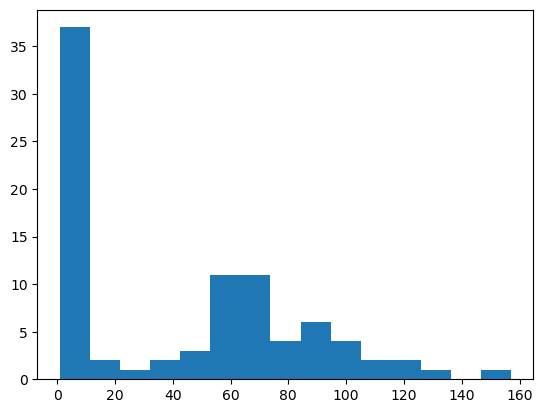

In [38]:
plt.hist(dataLen,bins=15)
plt.show()

In [39]:
## 기준길이
MAX_LENGTH=max(dataLen)
MAX_LENGTH

157

In [41]:
### [1] 가장 긴 문장 길이 기준
for idx,sent in enumerate(encodingData):
    cur_length=len(sent)
    if len(sent) < MAX_LENGTH:
        encodingData[idx]=sent+([0]*(MAX_LENGTH-cur_length))

In [45]:
### [2] 주어진 길이로 맞출떄
for idx,sent in enumerate(encodingData):
    cur_length=len(sent)
    if len(sent) < MAX_LENGTH:
        encodingData[idx]=sent+([0]*(MAX_LENGTH-cur_length))
    else:
        #앞부분 자를떄
        encodingData[idx]=sent[cur_length-MAX_LENGTH:]
        #뒷부분 자를때
        encodingData[idx]=sent[:MAX_LENGTH]

[[3, 2, 638, 224, 143, 639, 3, 2, 143, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [640, 641, 343, 98, 2, 45, 344, 4, 3, 78, 79, 2, 345, 80, 20, 346, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [3, 7, 26, 225, 642, 643,